# Tutorial 2: Neural Network Training
The tutorial is meant to build some understanding of how neural networks learn relationships between features `x` and a 
target `y`. The tutorial deals with gradient descent. In the exercises, we assume that students are familiar with the general form of neural networks. Hence, the architecture of neural networks is not part of the exercises. Instead, we recommend going through "Ex04-NN-Primer-part1.ipynb". That notebook covers the architecture of neural networks and the learning procedure. Here, we only focus on the latter."Ex04-NN-Primer-part1.ipynb" treats topics like gradient descent for neural networks of general architecture. 


For this exercise, we will restrict the architecture of the considered neural network to the form
$f(x)=\beta\cdot \sigma(x)$. This corresponds to a very simple neural network with linear output function, sigmoid activation, 1 hidden layer and bias (constants) forced to zero. By considering this simple neural network, the code becomes simpler, and you can (hopefully) gain a better intuition of neural network learning procedures.  

We will go through further exercises covering back-propagation and gradient descent during the session.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
## define sigmoid function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## create data
x = np.array(range(-10,10))
y = 2*sigmoid(x)

## Exercises
Our goal is to find the coefficient beta, such that the function $f(x,\beta)=\beta\cdot \sigma(x)$ fits the data best 
(according to the mean squared error).  
Your task is to implement gradient descent in order to find beta. This means in detail:

### Part A.
You need to calculate the derivative of the loss function $L(Y,f(X,\beta))=\frac{1}{n}\sum_{i}(y_{i}-f(x_{i},\beta))^{2} $ w.r.t. $\beta$.<br><br>
For simplicity we provide an impementation of this loss function called `grad_beta`

In [10]:
def func_f(beta, x):
    return beta*sigmoid(x)
    
def grad_beta(beta, y, x): 
    return np.mean(-2*(y-func_f(beta=beta, x=x))*sigmoid(x))

### Part B. 
Implement a function `grad_desc(beta_ini, lrate, n_epochs)`, with an initial value of beta, the learning rate and the number of iterations (called epochs) as parameters. The function should find the $\beta$ leading to the minimum loss.

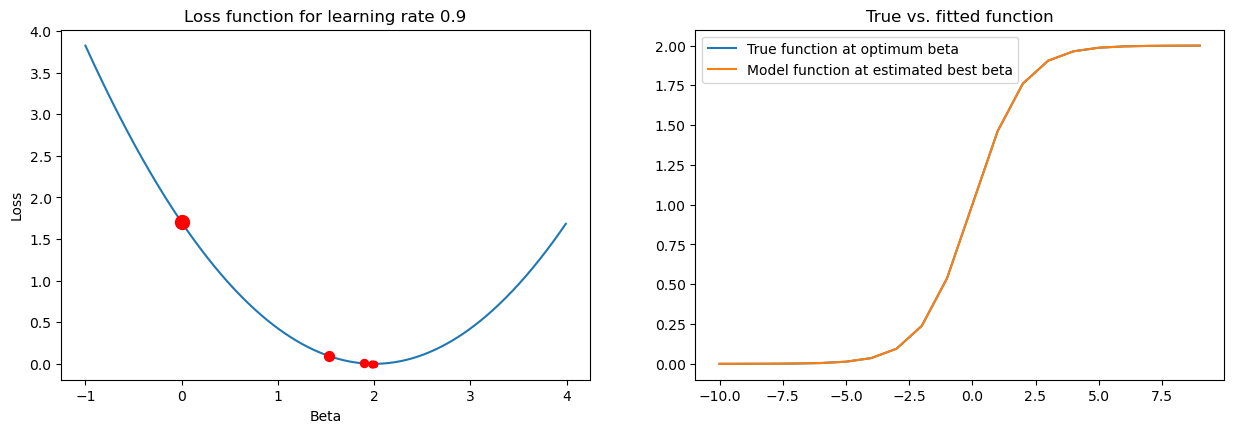

True Optimal Beta:  2.0
Current Beta:  2.0


In [12]:
beta_ini=0.0
lrate=0.9
n_epochs=20

cur_beta = beta_ini
cur_mse = np.mean(pow(y-func_f(cur_beta, x),2))

beta_loop_values=np.array(range(-100,400))/100
resulting_loss=[np.mean(pow(y-func_f(beta_loop,x),2 ) ) for beta_loop in beta_loop_values]

#The true function:
plt.rcParams['figure.figsize']=15,10
ax1=plt.subplot(2, 2, 1) # row 1, col 2 index 1
ax1.plot(beta_loop_values,resulting_loss)
ax1.plot(cur_beta, cur_mse, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
ax1.set_title('Loss function for learning rate '+ str(lrate))
ax1.set_xlabel('Beta')
ax1.set_ylabel('Loss')



iters=0
## iterative weight update
while iters < n_epochs:
    prev_beta = cur_beta 
    gr=grad_beta(cur_beta,y,x)

    #Beta after gradient descent:
    cur_beta = cur_beta - lrate * gr
    #Error after weight update:
    cur_mse = np.mean(pow(y-func_f(cur_beta,x),2))

    ## plot current beta in loss function
    ax1.plot(cur_beta, cur_mse, marker="o", markersize=10/np.sqrt((iters+2)), markeredgecolor="red", markerfacecolor="red")
    iters = iters+1 #iteration count
    



optimal_beta=cur_beta
ax2=plt.subplot(2, 2, 2)
true_optimal_beta_index=np.where(resulting_loss==np.min(resulting_loss))[0][0]
true_optimal_beta=beta_loop_values[true_optimal_beta_index]
ax2.plot(x,func_f(beta=true_optimal_beta,x=x))
ax2.plot(x,func_f(beta=optimal_beta,x=x))
ax2.set_title('True vs. fitted function')
ax2.legend(['True function at optimum beta','Model function at estimated best beta'],loc='upper left')
plt.show()
plt.close()

print('True Optimal Beta: ',true_optimal_beta)
print('Current Beta: ',round(optimal_beta,5))

In [13]:
def grad_desc(beta_ini,
             y,
             x,
             n_epochs,
             lrate):
    cur_beta = beta_ini
    cur_mse = np.mean(pow(y-func_f(cur_beta, x),2))

    beta_loop_values=np.array(range(-100,400))/100
    resulting_loss=[np.mean(pow(y-func_f(beta_loop,x),2 ) ) for beta_loop in beta_loop_values]

    #The true function:
    plt.rcParams['figure.figsize']=15,10
    ax1=plt.subplot(2, 2, 1) # row 1, col 2 index 1
    ax1.plot(beta_loop_values,resulting_loss)
    ax1.plot(cur_beta, cur_mse, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
    ax1.set_title('Loss function for learning rate '+ str(lrate))
    ax1.set_xlabel('Beta')
    ax1.set_ylabel('Loss')



    iters=0
    ## iterative weight update
    while iters < n_epochs:
        prev_beta = cur_beta 
        gr=grad_beta(cur_beta,y,x)
        
        #Beta after gradient descent:
        cur_beta = cur_beta - lrate * gr
        #Error after weight update:
        cur_mse = np.mean(pow(y-func_f(cur_beta,x),2))
        
        ## plot current beta in loss function
        ax1.plot(cur_beta, cur_mse, marker="o", markersize=10/np.sqrt((iters+2)), markeredgecolor="red", markerfacecolor="red")
        iters = iters+1 #iteration count
        


    

    optimal_beta=cur_beta
    ax2=plt.subplot(2, 2, 2)
    true_optimal_beta_index=np.where(resulting_loss==np.min(resulting_loss))[0][0]
    true_optimal_beta=beta_loop_values[true_optimal_beta_index]
    ax2.plot(x,func_f(beta=true_optimal_beta,x=x))
    ax2.plot(x,func_f(beta=optimal_beta,x=x))
    ax2.set_title('True vs. fitted function')
    ax2.legend(['True function at optimum beta','Model function at estimated best beta'],loc='upper left')
    plt.show()
    plt.close()

    print('True Optimal Beta: ',true_optimal_beta)
    print('Current Beta: ',round(optimal_beta,5))

### Part C. 
Apply your function for `beta_ini=0`, `n_epochs=20` and some learning rates of your choice. Which is the best learning rate? What happens for particularly high or low learning rates?

##### good learning rate #####


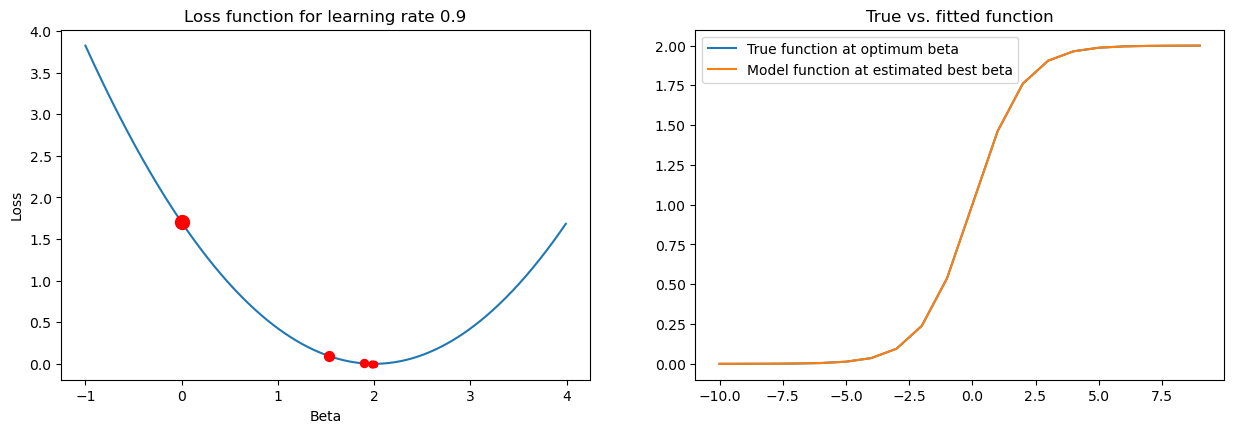

True Optimal Beta:  2.0
Current Beta:  2.0
##### high learning rate #####


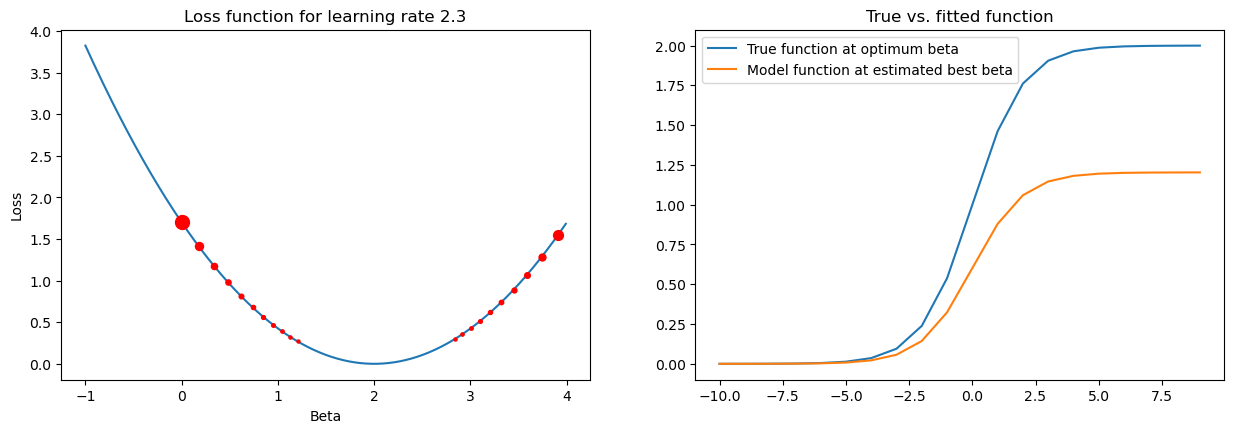

True Optimal Beta:  2.0
Current Beta:  1.20311
##### low learning rate #####


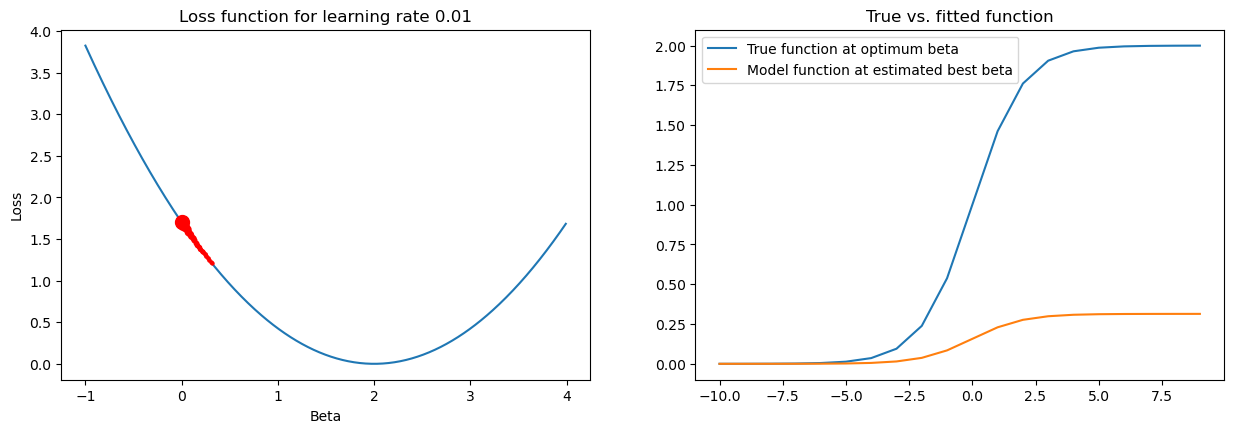

True Optimal Beta:  2.0
Current Beta:  0.3139


In [14]:
print('##### good learning rate #####')
grad_desc(beta_ini = 0,y=y,x=x, lrate=0.9, n_epochs=20)
print('##### high learning rate #####')
grad_desc(beta_ini = 0,y=y,x=x, lrate=2.3, n_epochs=20)
print('##### low learning rate #####')
grad_desc(beta_ini = 0,y=y,x=x, lrate=0.01, n_epochs=20)

## Extra exercises done in the tutorial
So far, we have seen how to use gradient descent to fit a simple model of the form $f(x,\beta)=\beta\cdot \sigma(x)$. However, implementing gradient descent is more challenging for more complex neural networks because the gradients are harder to calculate. Here is where back-propagation comes into play. 

Your task is to implement gradient descent with back-propagation for a slightly more complex neural network of the form $g(x,\gamma,\beta,\alpha)=\gamma\cdot \sigma(\beta\cdot \sigma(\alpha\cdot x))$.

In detail:


### Part A. 
You first need data points to fit the model, so let's create them

In [15]:
## create data
x = np.array(range(-10,10))
y = 2*sigmoid(sigmoid(x))

### Part B. 
You need to calculate the partial derivative of the loss function w.r.t. $\alpha$, $\beta$ and $\gamma$. 
Where is the back-propagation part in the calculation of the derivatives? 

For simplicity, we provide a sample solution of how to calculate the derivatives `grad_gamma`, `grad_beta`, `grad_alpha` at the weights `cur_alpha`, `cur_beta`, and `cur_gamma`. 

In [16]:
def func_g(alpha, beta, gamma, x):
    return gamma*sigmoid(beta*sigmoid(alpha*x))

def deriv_loss(cur_g, y):
    return -2*(y-cur_g)

def deriv_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))        

The back-propagation parts are the delta values (`delta_l3`, `delta_l2`) which are passed to the next layer. This makes the calculation of derivatives in the lower layers more efficient.  

### Part C.
Implement a function `grad_desc_backp(alpha_ini, beta_ini, gamma_ini, lrate, n_epochs)`, with an initial value of alpha, beta and 
gamma, the learning rate and a maximum number of iterations as parameters.

In [17]:
def grad_desc_backp(alpha_ini, beta_ini, gamma_ini, lrate, n_epochs):
    iters = 0
    cur_alpha = alpha_ini
    cur_beta = beta_ini
    cur_gamma = gamma_ini
    cur_mse = np.mean(pow(y-func_g(alpha = cur_alpha, beta = cur_beta, gamma = cur_gamma, x = x),2))
    
    plt.rcParams['figure.figsize']=25,15
    ax1=plt.subplot(2, 2, 1) # row 1, col 2 index 1
    ax1.plot(-1, cur_mse, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
    ax1.set_xlim(0,np.log(n_epochs+1))
    ax1.set_title('Loss function for learning rate '+ str(lrate))
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    
    ## iterative weight update
    while iters < n_epochs:

        ## function outputs for current weights
        cur_g = func_g(alpha = cur_alpha, beta = cur_beta, gamma = cur_gamma, x = x)
        
        ## gradients output layer
        h2 = sigmoid(cur_beta*sigmoid(cur_alpha*x))
        delta_l3 = deriv_loss(cur_g = cur_g, y = y)
        grad_gamma = np.mean(delta_l3*h2)
        
        ## gradient second hidden layer
        h1 = sigmoid(cur_alpha*x)
        delta_l2 = delta_l3 * cur_gamma * deriv_sigmoid(cur_beta*h1)
        grad_beta = np.mean(delta_l2*h1)
        
        
        ## gradient first hidden layer
        delta_l1 = delta_l2 * cur_beta * deriv_sigmoid(cur_alpha*x)
        grad_alpha = np.mean(delta_l1*x)
        
        
        ## update weights
        cur_alpha = cur_alpha - lrate * grad_alpha
        cur_beta = cur_beta - lrate * grad_beta
        cur_gamma = cur_gamma - lrate * grad_gamma
        cur_mse = np.mean(pow(y-func_g(alpha = cur_alpha, beta = cur_beta, gamma = cur_gamma, x = x),2)) 
        
        ## plot loss for current weights
        ax1.plot(np.log(iters+1),cur_mse, marker="o", markersize=10/np.sqrt((iters+2)), markeredgecolor="red", markerfacecolor="red")
        iters = iters+1
        
        #iteration count
        
    ## show plot
    ax2=plt.subplot(2, 2, 2) # index 2
    ax2.plot(x, y)
    ax2.plot(x, func_g(alpha = cur_alpha, beta = cur_beta, gamma = cur_gamma, x = x))
    ax2.legend(['True function','Model function estimated at trainable parameters'],loc="upper left")
    ax2.set_title('True vs. fitted function')
    plt.show()
    plt.close()

### Part D.
Apply your function for alpha_ini=2,beta_ini=0, gamma_ini=0, n_epochs=1000 and some learning rates of your choice.
Which is the best learning rate? 

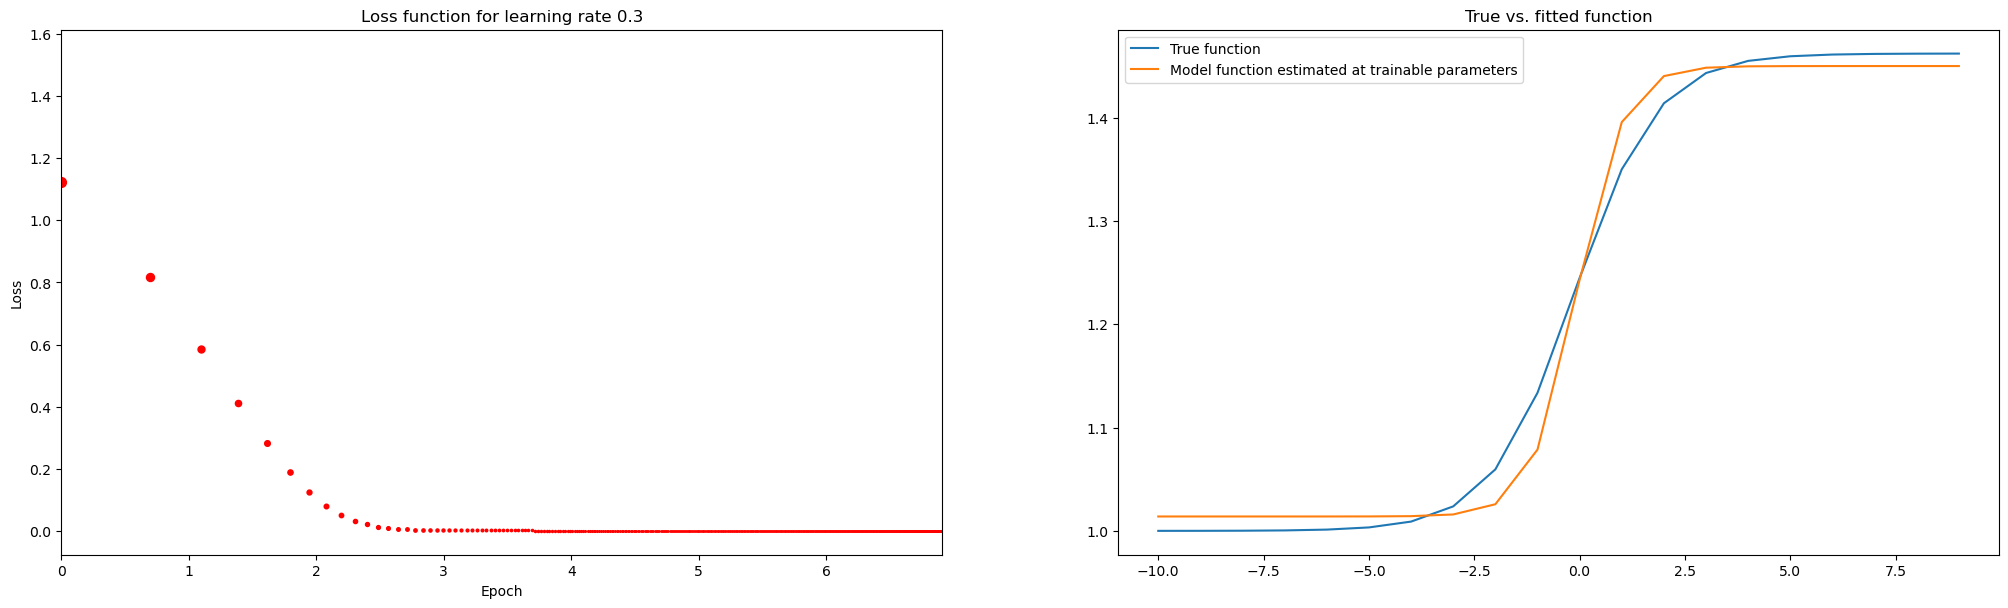

In [18]:
grad_desc_backp(alpha_ini=2, beta_ini=0, gamma_ini=0, lrate = 0.3, n_epochs = 1000)

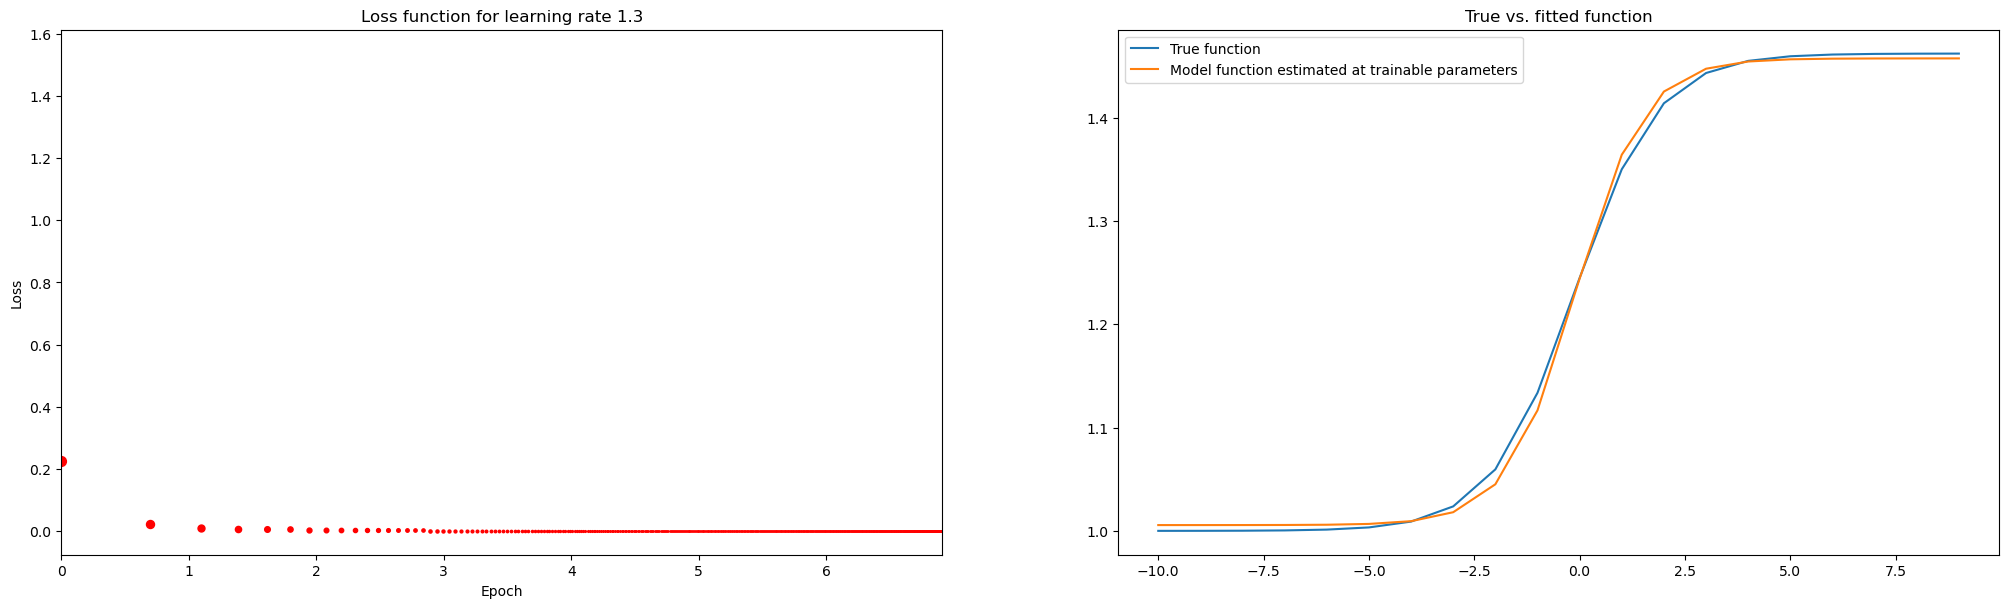

In [19]:
grad_desc_backp(alpha_ini=2, beta_ini=0, gamma_ini=0, lrate = 1.3, n_epochs = 1000)

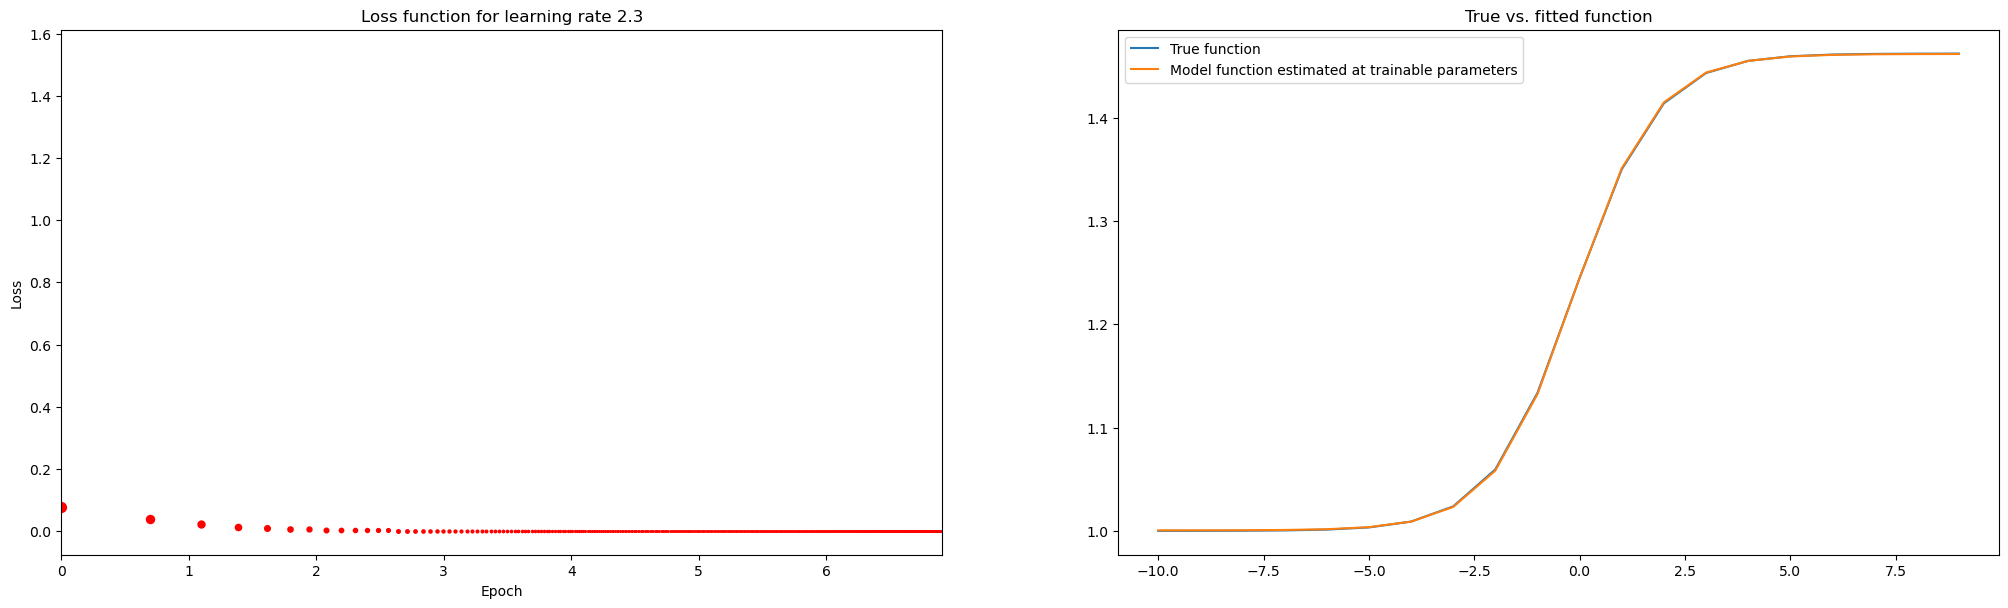

In [20]:
grad_desc_backp(alpha_ini=2, beta_ini=0, gamma_ini=0, lrate = 2.3, n_epochs = 1000)

So far, we covered the case when we have single feature, and we trained a network of either a single weight, or several weights to estimate the regression target variable. The backward pass using the backpropagation algorithm was computed in the following way:<br>
$\delta^{(l)}=\delta^{(l+1)} \cdot w^{(l+1)}\cdot g^{\prime}(z^{(l)})$<br>
However, usually in practice we are dealing with multivariate data:

In [11]:
num_samples=200
num_features=5
input_features=np.reshape(np.random.normal(size=num_samples*num_features),newshape=(num_samples,num_features))
target=np.tanh(input_features[:,:2]).mean(axis=1)+(input_features[:,2:4]**2).sum(axis=1)+sigmoid(input_features[:,-1])

If we were to feed such data to a neural network, we would use weight matrices, instead of single weights:

In [19]:
num_units=10
w1=np.reshape(np.random.normal(size=(input_features.shape[1]*num_units)),newshape=(input_features.shape[1],num_units))
b1=np.random.normal(size=num_units)
print('Shape of input dataset: ',input_features.shape)
print('Shape of weights in hidden layer: ',w1.shape)
print('Shape of biases: ',b1.shape)
z1=np.dot(input_features,w1)+b1
g1=sigmoid(z1)
print('Shape of non-linear latent space: ',g1.shape)

Shape of input dataset:  (200, 5)
Shape of weights in hidden layer:  (5, 10)
Shape of biases:  (10,)
Shape of non-linear latent space:  (200, 10)


The addition of matrices with different shapes in z1 is enabled by the mechanism **broadcasting**.<br>
(https://numpy.org/doc/stable/user/basics.broadcasting.html)<br><br>
Since we have a weight matrix now, the computation of the backward pass would also change slightly:<br>
$\delta^{(l)}=((W^{(l+1)})^{T}\cdot \delta^{(l+1)})  \odot g^{\prime}(Z^{(l)})$<br> (https://towardsdatascience.com/back-propagation-the-easy-way-part-1-6a8cde653f65)